In [ ]:
import pandas as pd
import os
import glob

In [ ]:
dat = '/InfoGroup/data/original/'

In [ ]:
filelist = glob.glob(os.path.join(dat, '2*.csv'))

In [ ]:
# Total employment by year
emp = {}
for f in filelist:
    year = f[25:29]
    ser = pd.read_csv(f,usecols=['Employee Size (5) - Location'],dtype=float)
    tot = ser['Employee Size (5) - Location'].sum()
    emp[year] = tot

In [ ]:
scores = set([2362,2382,3111,3112,3114,3115,3116,3117,3119,3222,3251,3253,3261,3272,3332,3333,
          3339,3352,3369,3371,4234,4238,4241,4244,4246,4249,4451,4452,4461,4471,4529,4543,
          5413,5417,6242,7223,7225,8113,9231,9261,1151,1152,2371,2379,3219,3254,3322,3323,
          3324,3326,3331,3399,4245,4442,4842,4931,5222,5324,5419,7121,8129,8134,8139])

In [ ]:
df_fai_list = [] 
for f in filelist:
    year = f[25:29]
    df= pd.read_csv(f,usecols=['Primary NAICS Code', 'Employee Size (5) - Location', 'CBSA Level'], \
                    dtype='object')
    print(str(len(df)),'rows in full DataFrame for',year)
    df['CBSA Level'].fillna('0',inplace=True)
    df['year'] = year

    df = df.dropna()
    print('\t'+str(len(df)),'rows left after removing NaN on NAICS Code and Employment')
    df['Primary NAICS Code'] = df['Primary NAICS Code'].astype(int)

    df['Short NAICS'] = df['Primary NAICS Code'].apply(lambda x: int(x/10000))
    df = df[df['Short NAICS'].isin(scores)]
    print('\t'+str(len(df)),'rows left after selecting those in FAI NAICS categories')
    
    df_fai_list.extend(df[['year','Employee Size (5) - Location','CBSA Level']].values.tolist())


13196449 rows in full DataFrame for 2005
	12775717 rows left after removing NaN on NAICS Code and Employment
	2790254 rows left after selecting those in FAI NAICS categories
12743180 rows in full DataFrame for 2003
	12363031 rows left after removing NaN on NAICS Code and Employment
	2674539 rows left after selecting those in FAI NAICS categories
12616724 rows in full DataFrame for 2004
	12291698 rows left after removing NaN on NAICS Code and Employment
	2668554 rows left after selecting those in FAI NAICS categories
15716633 rows in full DataFrame for 2016
	14636174 rows left after removing NaN on NAICS Code and Employment
	2948212 rows left after selecting those in FAI NAICS categories
15916903 rows in full DataFrame for 2014
	15243173 rows left after removing NaN on NAICS Code and Employment
	3138632 rows left after selecting those in FAI NAICS categories
15954358 rows in full DataFrame for 2013
	15553212 rows left after removing NaN on NAICS Code and Employment
	3148797 rows left af

In [ ]:
# 2017
metro = df[df['CBSA Level']=='2']
micro = df[df['CBSA Level']=='1']
rur = df[df['CBSA Level']=='0']
xsum = metro['Employee Size (5) - Location'].astype(float).sum()
print(xsum/emp['2017'])
xsum = micro['Employee Size (5) - Location'].astype(float).sum()
print(xsum/emp['2017'])
xsum = rur['Employee Size (5) - Location'].astype(float).sum()
print(xsum/emp['2017'])

0.19732331017832985
0.020109995541075783
0.013144864123599675


In [ ]:
df_fai = pd.DataFrame(df_fai_list,columns=['year','Employees','CBSA Level'],dtype=object)
df_fai['Employees'] = df_fai['Employees'].astype(float)
df_fai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43041388 entries, 0 to 43041387
Data columns (total 3 columns):
year          object
Employees     float64
CBSA Level    object
dtypes: float64(1), object(2)
memory usage: 985.1+ MB


In [ ]:
grouped = df_fai.groupby(['year','CBSA Level'])['Employees'].agg('sum')
print(len(df_fai))
print(len(grouped))
grouped.reset_index().to_csv(dat+'fai_grouped.csv',index=None)

43041388
45


In [ ]:
data_items = emp.items()
data_list = list(data_items)
df_ann_emp = pd.DataFrame(data_list,columns=['year','total_emp'])
df_ann_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
year         15 non-null object
total_emp    15 non-null float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [ ]:
# Now merge df_fai and df_ann_emp and output the file.
df_fai = pd.read_csv(dat+'fai_grouped.csv',dtype=object)
merged = df_fai.merge(df_ann_emp,on='year',indicator=False)

In [ ]:
merged.to_csv(dat+'merged_fai.csv',index=None)

In [ ]:
merged.columns

Index(['year', 'CBSA Level', 'Employees', 'total_emp'], dtype='object')

# --------------------- IMAGES ---------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dat = '/InfoGroup/data/original/'
df = pd.read_csv(dat+'merged_fai.csv',dtype={'year':'object','CBSA Level':'object',
                                             'Employees':'float','total_emp':'float'})

In [ ]:
df['emp_share'] = df['Employees']/df['total_emp']
df.drop(columns=['Employees','total_emp'],inplace=True)

In [ ]:
def ren(code):
    if code == '0':
        return 'rural'
    elif code == '1':
        return 'micropolitan'
    elif code == '2':
        return 'metropolitan'
df['CBSA'] = df['CBSA Level'].apply(ren)
df.drop(columns=['CBSA Level'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       45 non-null     object 
 1   emp_share  45 non-null     float64
 2   CBSA       45 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


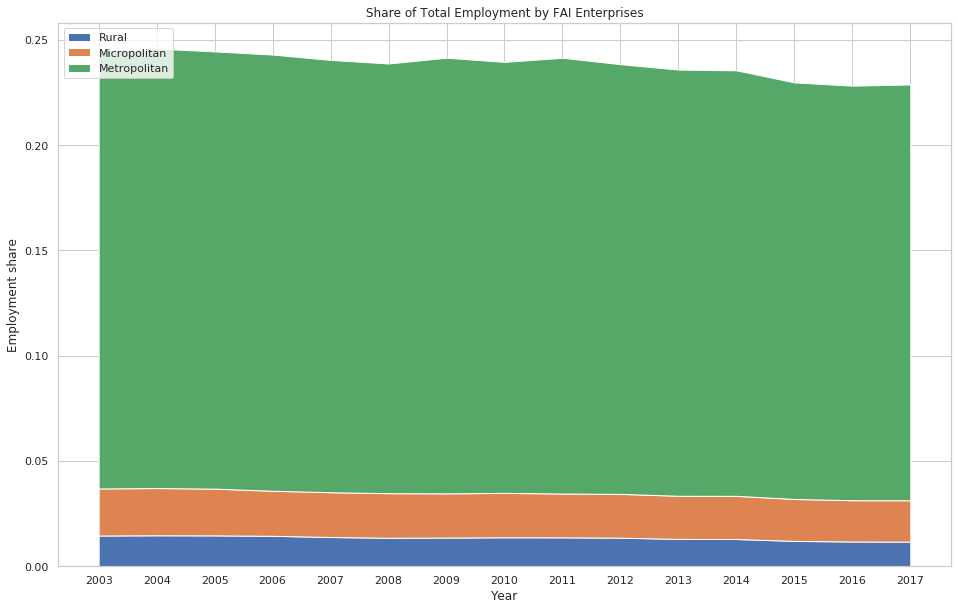

In [ ]:
labels = ["Rural", "Micropolitan", "Metropolitan"]
fig, ax = plt.subplots()
fig.set_size_inches( 16, 10)
x = list(dict.fromkeys(df['year'].tolist()))
x.sort()
y1 = df.loc[df['CBSA'] == 'rural']['emp_share'].to_list()
y2 = df.loc[df['CBSA'] == 'micropolitan']['emp_share'].to_list()
y3 = df.loc[df['CBSA'] == 'metropolitan']['emp_share'].to_list()
ax.stackplot(x, y1, y2, y3, labels=labels) 
ax.legend(loc='upper left')
plt.ylabel("Employment share")
plt.xlabel("Year")
plt.title("Share of Total Employment by FAI Enterprises")
plt.show()

# This shows how to do this kind of graphic.  Needs more sns style?

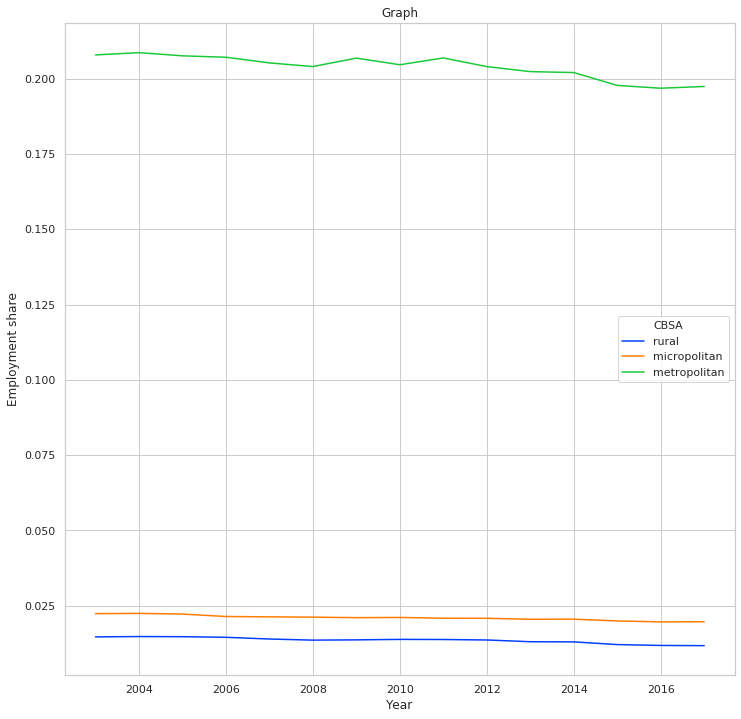

In [ ]:
# Figure 1
sns.set(style="whitegrid")
df['year'] = df['year'].astype(int)
plt.figure(figsize=(12,12))
sns.lineplot(data=df, x='year', y = "emp_share", hue="CBSA",
             palette='bright',legend='full')
plt.title('Graph')
plt.ylabel("Employment share")
plt.xlabel("Year")

plt.show()